In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/weather-data")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/prasad22/weather-data/versions/1


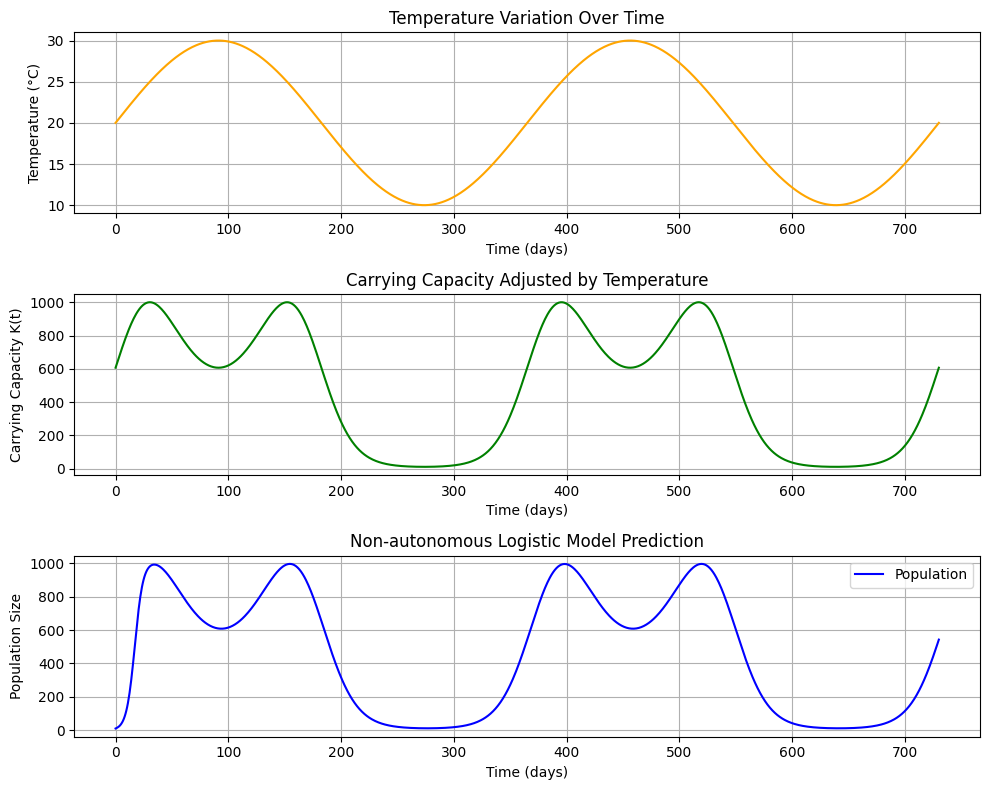

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def temperature(t):
    """
    Simulate temperature variation over time.
    Here we assume the temperature fluctuates periodically with time.
    The temperature is modeled as a sine function with an average of 20°C,
    an amplitude of 10°C, and a period of 365 days.
    """
    return 20 + 10 * np.sin(2 * np.pi * t / 365)

def carrying_capacity(t, K0=1000, T_opt=25, sigma=5):
    """
    Adjust the carrying capacity based on temperature.
    
    K0: Base carrying capacity.
    T_opt: Optimal temperature.
    sigma: Standard deviation that defines the range of optimal temperatures.
    
    When the temperature T is close to T_opt, the adjustment factor f(T) is near 1.
    Otherwise, f(T) decreases, reducing the effective carrying capacity.
    """
    T = temperature(t)
    f = np.exp(-((T - T_opt) ** 2) / (2 * sigma ** 2))
    return K0 * f

def logistic_growth_variable(t, x0, r, K0):
    """
    Non-autonomous logistic model:
        dx/dt = r * x * (1 - x/K(t))
    where K(t) is adjusted according to the current temperature.
    
    Since an analytic solution is not straightforward, we use numerical integration.
    """
    dt = t[1] - t[0]
    x = np.zeros_like(t)
    x[0] = x0
    for i in range(1, len(t)):
        K_current = carrying_capacity(t[i], K0=K0)
        dx = r * x[i - 1] * (1 - x[i - 1] / K_current)
        x[i] = x[i - 1] + dx * dt
    return x

if __name__ == "__main__":
    # Model parameters
    x0 = 10      # Initial population size
    r = 0.3      # Intrinsic growth rate
    K0 = 1000    # Base carrying capacity

    # Create a time series for two years (in days)
    t = np.linspace(0, 730, 1000)
    
    # Compute temperature and the corresponding carrying capacity K(t)
    temp = temperature(t)
    K_t = carrying_capacity(t, K0=K0)
    
    # Numerically solve the non-autonomous logistic model
    population = logistic_growth_variable(t, x0, r, K0)
    
    # Plot the results with English labels
    plt.figure(figsize=(10, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(t, temp, color='orange')
    plt.xlabel("Time (days)")
    plt.ylabel("Temperature (°C)")
    plt.title("Temperature Variation Over Time")
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(t, K_t, color='green')
    plt.xlabel("Time (days)")
    plt.ylabel("Carrying Capacity K(t)")
    plt.title("Carrying Capacity Adjusted by Temperature")
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(t, population, label="Population", color='blue')
    plt.xlabel("Time (days)")
    plt.ylabel("Population Size")
    plt.title("Non-autonomous Logistic Model Prediction")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()